In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\mosta\Downloads\archive (16).zip"

df = pd.read_csv(file_path, compression='zip')

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.fillna(0, inplace=True)

In [4]:
AHT = df['connected_handling_time'].mean()
print(f"Average Handling Time: {AHT:.2f} seconds")


Average Handling Time: 383.95 seconds


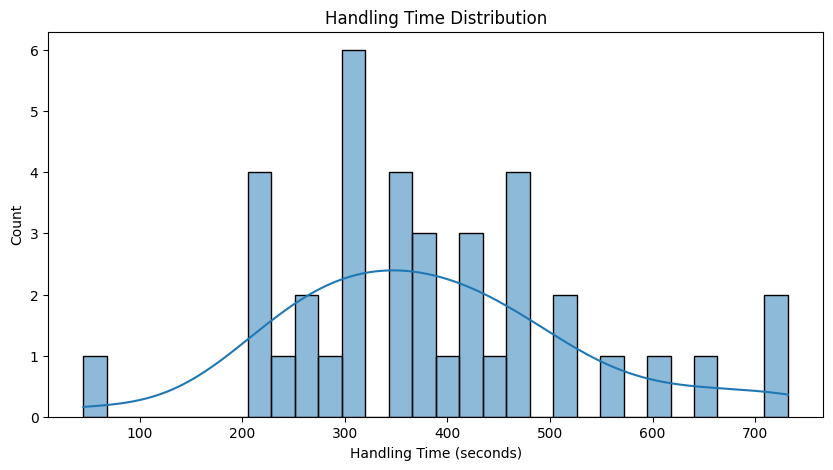

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['connected_handling_time'], bins=30, kde=True)
plt.xlabel("Handling Time (seconds)")
plt.title("Handling Time Distribution")
plt.show()


In [9]:
sla_threshold = 300  
sla_met = (df['connected_handling_time'] <= sla_threshold).sum()
sla_percentage = (sla_met / len(df)) * 100

print(f"Percentage of Orders Meeting SLA: {sla_percentage:.2f}%")


Percentage of Orders Meeting SLA: 26.32%


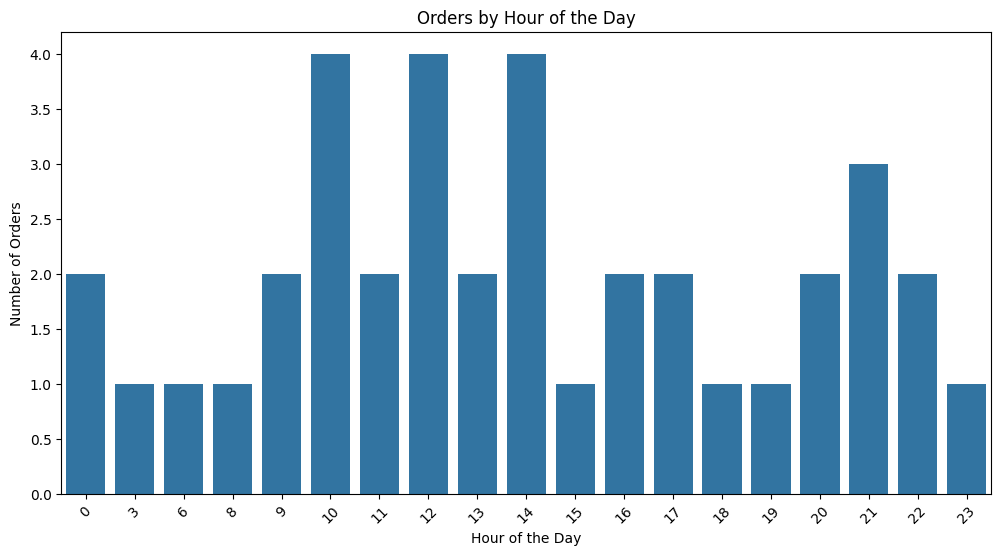

In [12]:
# Ensure the 'order_date_time' column is in datetime format
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')

# Extract the hour from the datetime column
df['order_hour'] = df['order_date_time'].dt.hour
hourly_orders = df.groupby('order_hour')['Order_id'].count()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Orders by Hour of the Day")
plt.xticks(rotation=45)
plt.show()


In [15]:

if 'team_name' not in df.columns:
	df['team_name'] = 'Default Team' 

team_aht = df.groupby('team_name')['connected_handling_time'].mean().sort_values()
print(team_aht)


team_name
Default Team    383.947368
Name: connected_handling_time, dtype: float64


In [17]:
team_orders = df['team_name'].value_counts()
print(team_orders)



team_name
Default Team    38
Name: count, dtype: int64


In [19]:
sla_threshold = 300  # Define SLA in seconds
team_sla = df.groupby('team_name')['connected_handling_time'].apply(lambda x: (x <= sla_threshold).mean() * 100)
print(team_sla.sort_values(ascending=False))


team_name
Default Team    26.315789
Name: connected_handling_time, dtype: float64


In [46]:
supervisor_aht = df.groupby('Supervisor')['connected_handling_time'].mean().sort_values()
print(supervisor_aht)


Supervisor
Oliver Nguyen       221.000000
Charlotte Suzuki    241.000000
Mia Patel           354.000000
Ethan Nakamura      384.000000
Mason Gupta         394.307692
Ava Wong            418.000000
Olivia Wang         427.285714
Madison Kim         461.500000
Aiden Patel         505.000000
Name: connected_handling_time, dtype: float64


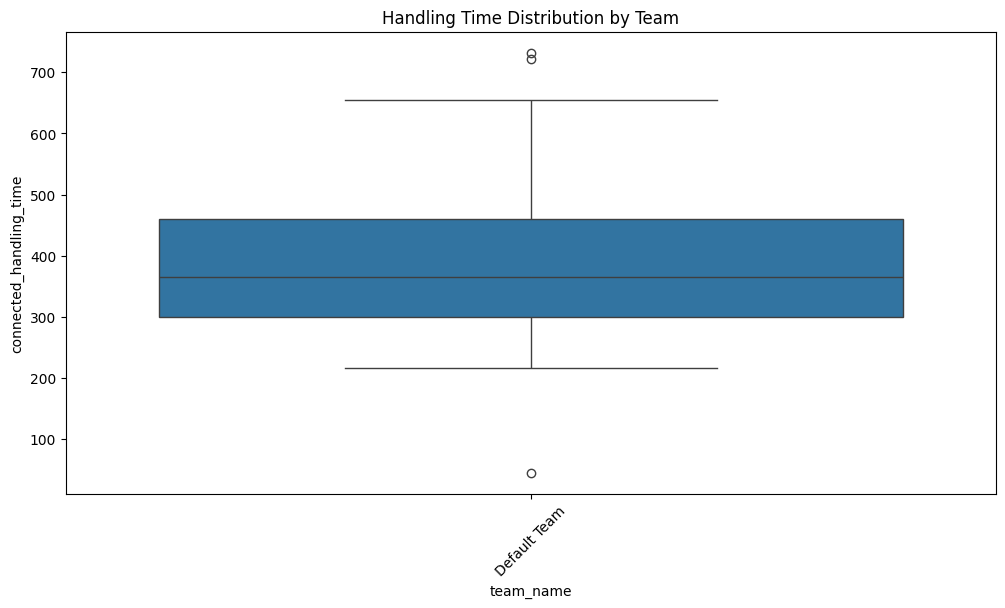

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='team_name', y='connected_handling_time', data=df)
plt.xticks(rotation=45)
plt.title("Handling Time Distribution by Team")
plt.show()


C:\Users\mosta\AppData\Local\Temp\ipykernel_12552\2340426246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('Supervisor')['CSAT Score'].mean().index,


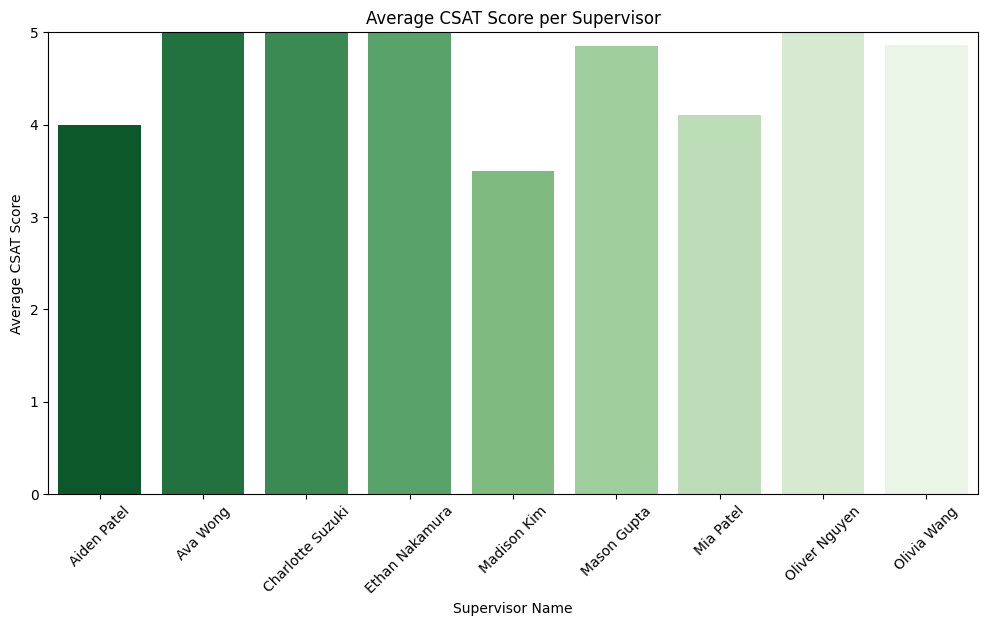

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby('Supervisor')['CSAT Score'].mean().index, 
            y=df.groupby('Supervisor')['CSAT Score'].mean().values, 
            palette="Greens_r")

plt.xticks(rotation=45)
plt.xlabel("Supervisor Name")
plt.ylabel("Average CSAT Score")
plt.title("Average CSAT Score per Supervisor")
plt.ylim(0, 5)
plt.show()


C:\Users\mosta\AppData\Local\Temp\ipykernel_12552\2222831585.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=csat_per_shift.index, y=csat_per_shift.values, palette="coolwarm")


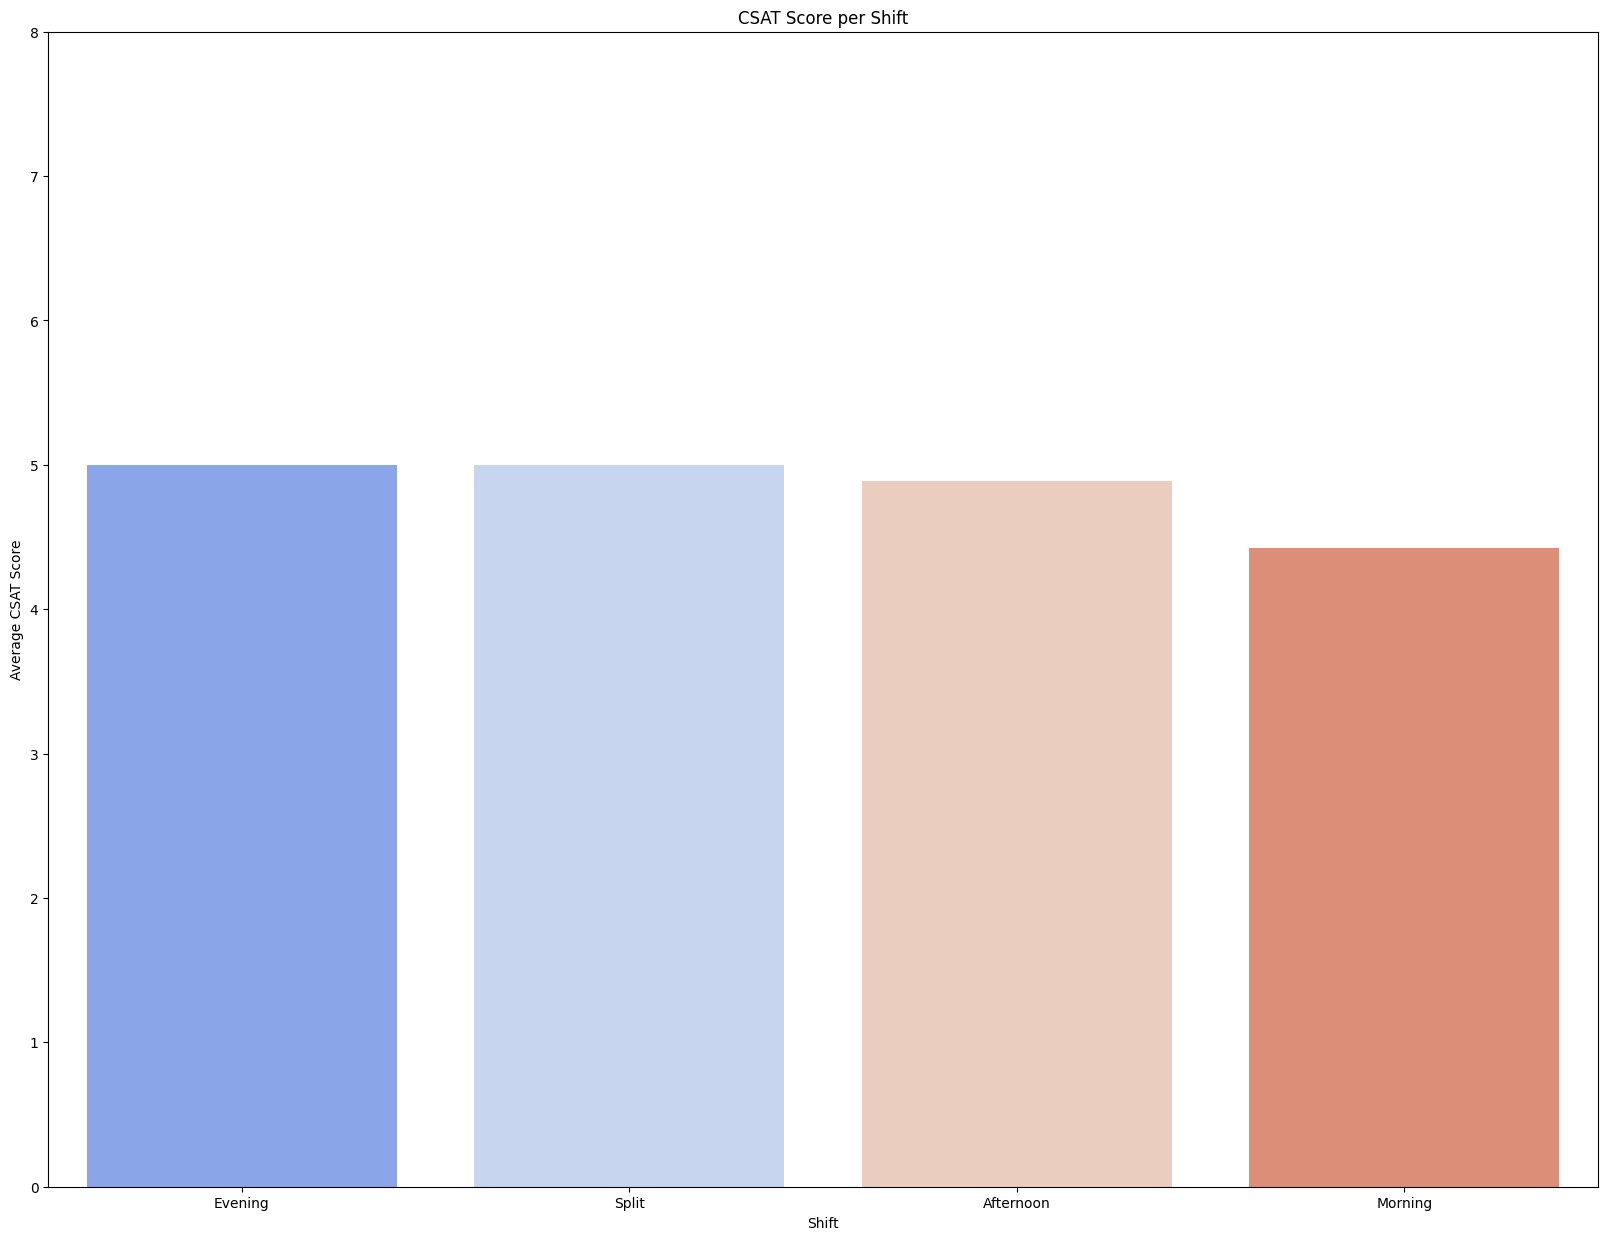

In [42]:
# CSAT_PER_SHIFT
csat_per_shift = df.groupby('Agent Shift')['CSAT Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 15))
sns.barplot(x=csat_per_shift.index, y=csat_per_shift.values, palette="coolwarm")

plt.xlabel("Shift")
plt.ylabel("Average CSAT Score")
plt.title("CSAT Score per Shift")
plt.ylim(0, 8)  # Assuming CSAT is rated from 1 to 5
plt.show()


C:\Users\mosta\AppData\Local\Temp\ipykernel_12552\1864296512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=csat_count_per_shift.index, y=csat_count_per_shift.values, palette="Blues_r")


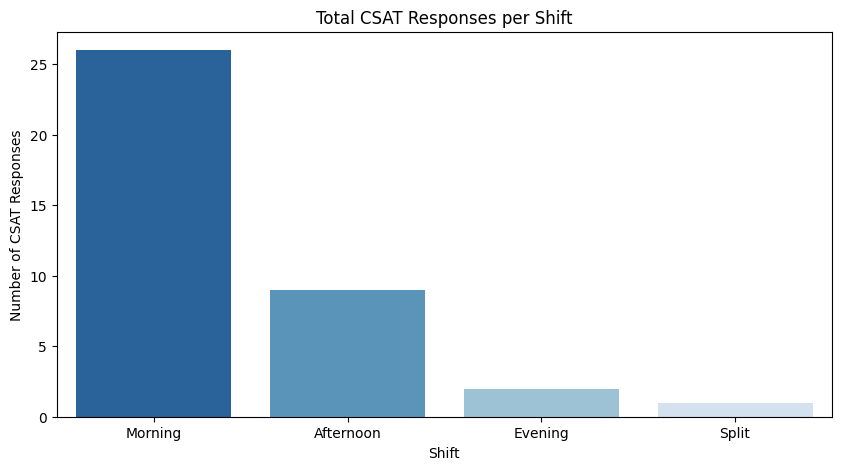

In [44]:
csat_count_per_shift = df.groupby('Agent Shift')['CSAT Score'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=csat_count_per_shift.index, y=csat_count_per_shift.values, palette="Blues_r")

plt.xlabel("Shift")
plt.ylabel("Number of CSAT Responses")
plt.title("Total CSAT Responses per Shift")
plt.show()
